# Обзор алгоритмов машинного обучения

## 1. Особенности работы алгоритмов

Представьте графически работу различных алгортмов машинного обучения и сохраните картинки в отчете (удобней всего в google-docs). Для этого:

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score


* Возьмите датасет вашего варианта (см. список ниже). Найдите два **количественных** признака, от которых сильнее всего зависит целевой. Далее работайте с датасетом, содержащим только эти два признака и целевой.

In [7]:
file_path = 'bodyfat.csv'
data = pd.read_csv(file_path)
print(data.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [8]:
target = 'Neck'
n = 38
data['Neck_Binary'] = (data[target] <= n).astype(int)
print(data.head())
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
quantitative_features.remove(target)

correlation_matrix = data[quantitative_features + ['Neck_Binary']].corr()

binary_neck_correlation = correlation_matrix['Neck_Binary'].sort_values(ascending=False)

print(binary_neck_correlation)

target = ['Neck_Binary', 'Weight', 'Chest']

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  Neck_Binary  
0  37.3   21.9    32.0     27.4   17.1            1  
1  37.3   23.4    30.5     28.9   18.2            0  
2  38.9   24.0    28.8     25.2   16.6            1  
3  37.3   22.8    32.4     29.4   18.2            1  
4  42.2   24.0    32.2     27.7   17.7            1  
Neck_Binary    1.000000
Density        0.426435
Age           -0.093293
Height        -0.213504
Ankle         -0.363244
BodyFat       -0.440380
Thigh         -0.506920
Knee          -0.511106
For

* Постройте график рассеяния всей выборки (отобразив цветом целевой класс). 

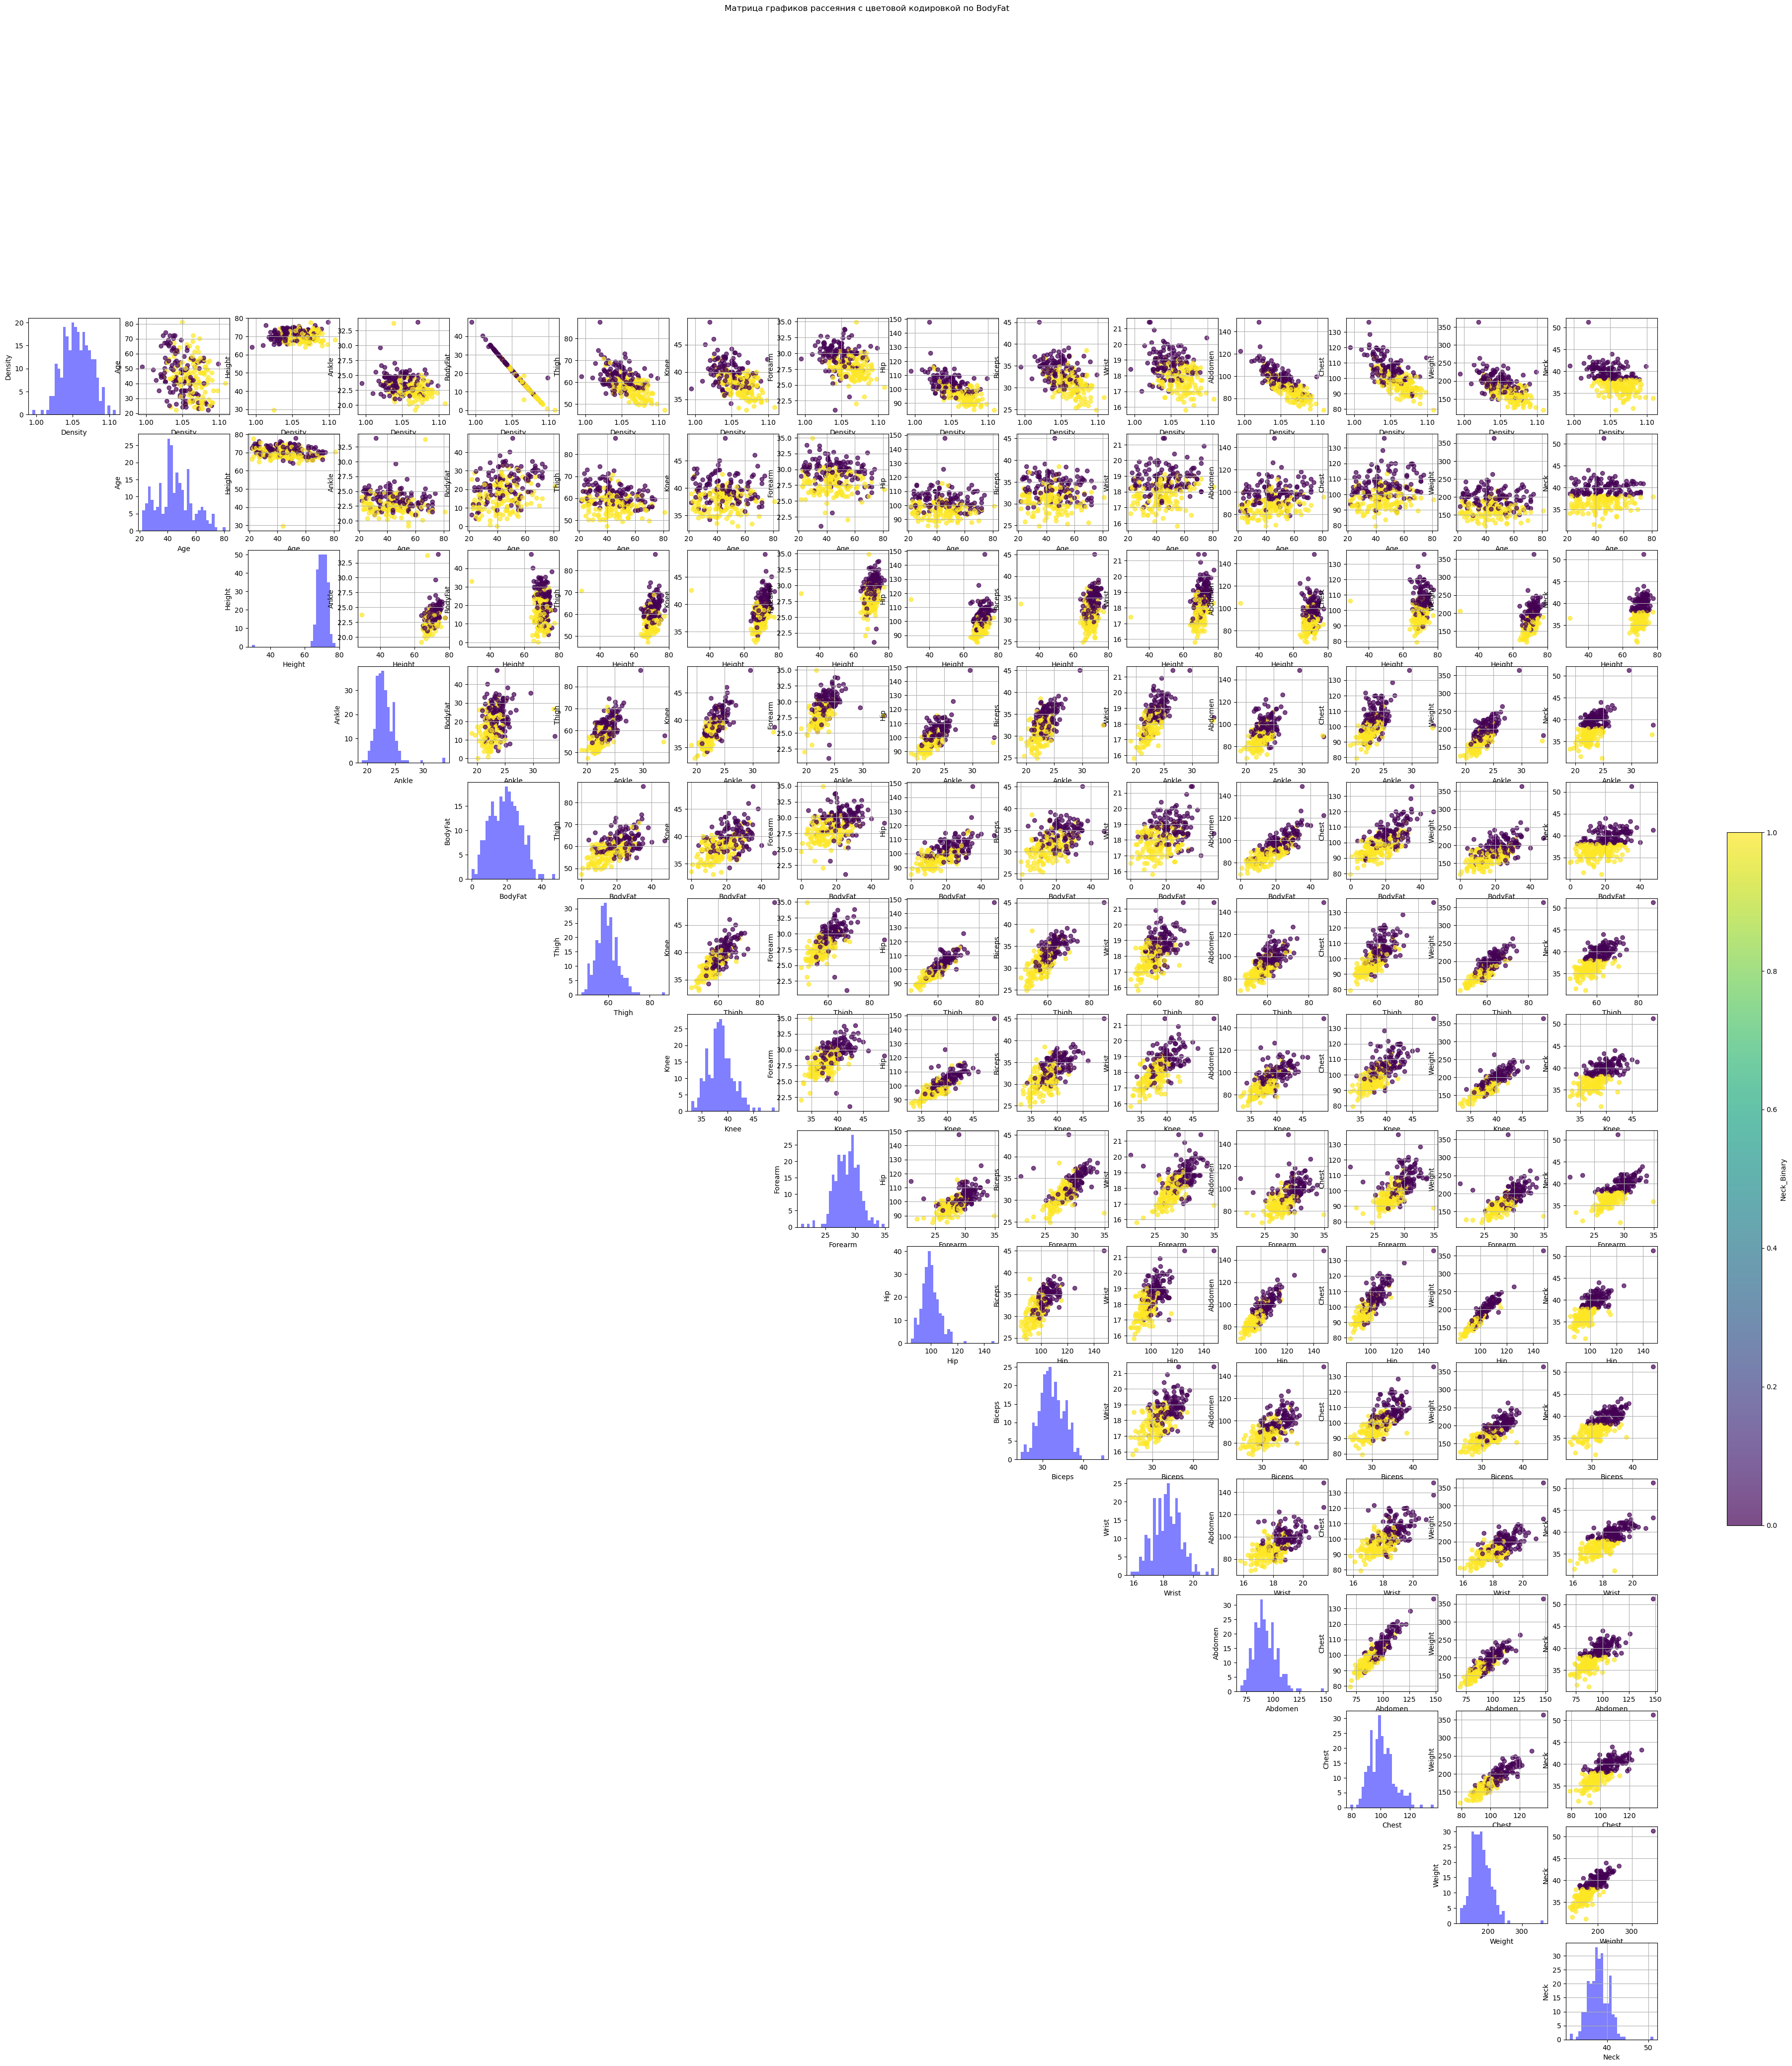

In [10]:
'''
quantitative_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
''' 
quantitative_features = [
'Density',
'Age',
'Height',
'Ankle',
'BodyFat',
'Thigh',
'Knee',
'Forearm',
'Hip',
'Biceps',
'Wrist',
'Abdomen',
'Chest',
'Weight',
'Neck'
]
#'''

num_features = len(quantitative_features)
fig, axes = plt.subplots(num_features, num_features, figsize=(num_features*3, num_features*3))


for i, feature_x in enumerate(quantitative_features):
    for j, feature_y in enumerate(quantitative_features):
        

        if i <j:
            scatter = axes[i, j].scatter(data[feature_x], data[feature_y], c=data['Neck_Binary'], cmap='viridis', alpha=0.7)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)
            axes[i, j].grid()


        elif i > j:
            axes[i, j].axis('off')
        
        else:
            axes[i, j].hist(data[feature_x], bins=30, color='blue', alpha=0.5)
            axes[i, j].set_xlabel(feature_x)
            axes[i, j].set_ylabel(feature_y)

# Настраиваем цветовую карту
cbar = fig.colorbar(scatter, ax=axes[:, :], orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Neck_Binary')
plt.suptitle('Матрица графиков рассеяния с цветовой кодировкой по BodyFat', y=1.02)
plt.grid()
plt.show()

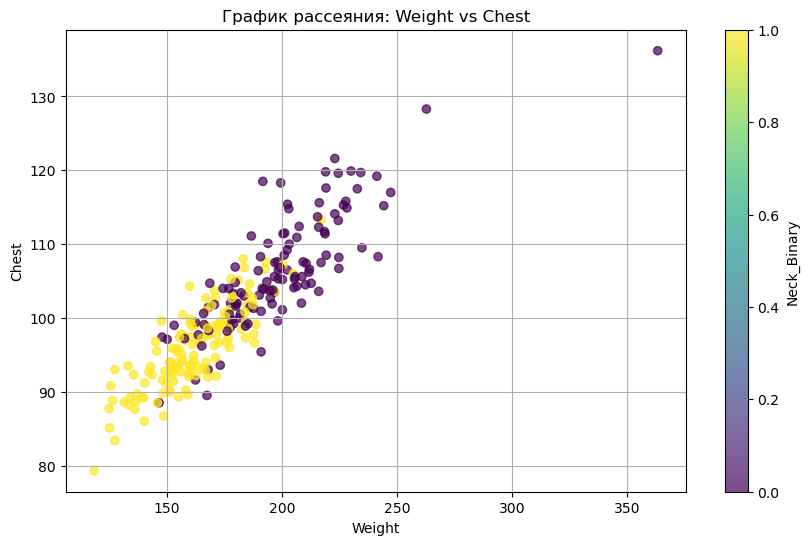

In [11]:
# График рассеяния для Abdomen и Chest
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Neck_Binary')
plt.title(f'График рассеяния: {target[1]} vs {target[2]}')
plt.xlabel(target[1])
plt.ylabel(target[2])
plt.grid()
plt.show()

* Постройте карты работы следующих алгоритмов для разных значений параметров: sklearn.tree.DecisionTreeClassifier, sklearn.neighbors.KNeighborsClassifier. Подберите параметры так, чтобы алгоритм оказался недообучен и переобучен. Отобразите те области карты, на которых лучше всего видна степень обученности модели и разместите две картинки в один ряд в отчете. При помощи кросс-валидации подтвердите факты недообучения и переобучения алгоритмов для подобранных вами параметров.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
X = data[[target[1], target[2]]]
y = data[target[0]]

scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X
# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [15]:
# Настройка параметров для недообучения и переобучения
n=30

dtc_parameters = [i for i in range(1,n+1)]
knn_parameters = [i for i in range(1,n+1)]

In [16]:
def DecisionTreeClassifierFunc(data, x, y, label, depth):
    model = DecisionTreeClassifier(max_depth=depth)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max()-100)
    ylim = (data[y].min(), data[y].max()-10)
    model.fit(data.loc[:,[x,y]], data[label])
    grid_x = np.linspace(*xlim, 100)
    grid_y = np.linspace(*ylim, 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    # в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
    prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))
    ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax, alpha=0.7)
    ax.set_title(f'Decision Tree Classifier - {depth}')
    
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
# Обучение и кросс-валидация для DecisionTree
dtc_scores = []
dtc_scores_test = []
for max_depth in dtc_parameters:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    dtc_scores.append(scores.mean())
    y_pred = model.predict(X_train)
    dtc_scores_test.append(accuracy_score(y_train,y_pred))
for i in range(n):
    print(f'{i+1:3} | {dtc_scores[i]:.5f} | {dtc_scores_test[i]:.5f}')

  1 | 0.77788 | 0.84091
  2 | 0.77388 | 0.84091
  3 | 0.78996 | 0.86364
  4 | 0.77380 | 0.89205
  5 | 0.75796 | 0.92045
  6 | 0.74204 | 0.94886
  7 | 0.73443 | 0.97159
  8 | 0.73027 | 0.98864
  9 | 0.72635 | 0.98864
 10 | 0.71827 | 0.99432
 11 | 0.72235 | 0.99432
 12 | 0.71843 | 0.99432
 13 | 0.71843 | 0.99432
 14 | 0.71059 | 0.99432
 15 | 0.71443 | 0.99432
 16 | 0.69875 | 0.99432
 17 | 0.71435 | 0.99432
 18 | 0.71443 | 0.99432
 19 | 0.70667 | 0.99432
 20 | 0.71443 | 0.99432
 21 | 0.72627 | 0.99432
 22 | 0.70667 | 0.99432
 23 | 0.70667 | 0.99432
 24 | 0.71043 | 0.99432
 25 | 0.71043 | 0.99432
 26 | 0.71843 | 0.99432
 27 | 0.71043 | 0.99432
 28 | 0.71443 | 0.99432
 29 | 0.70251 | 0.99432
 30 | 0.70267 | 0.99432


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


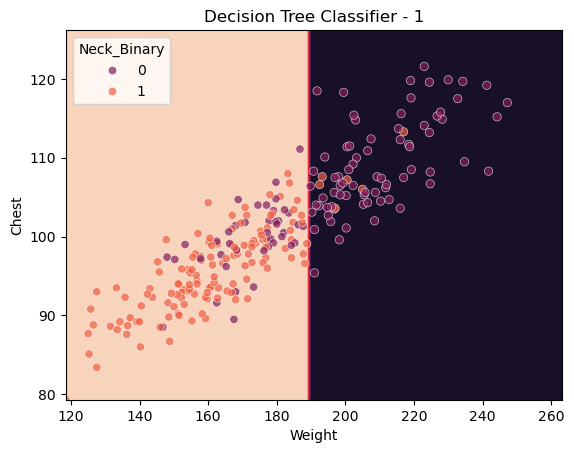

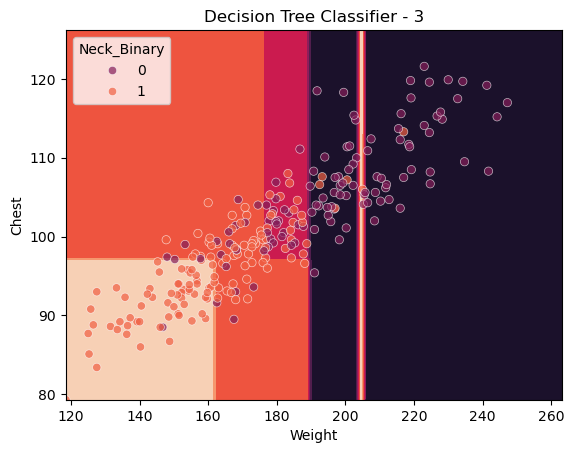

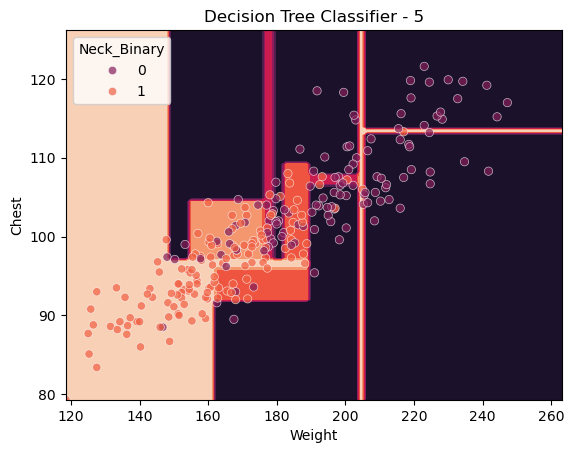

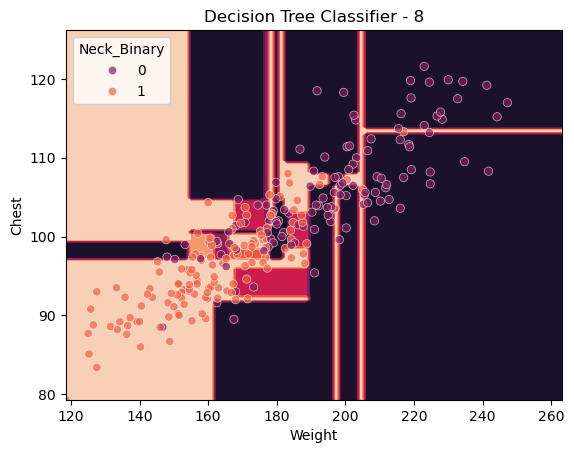

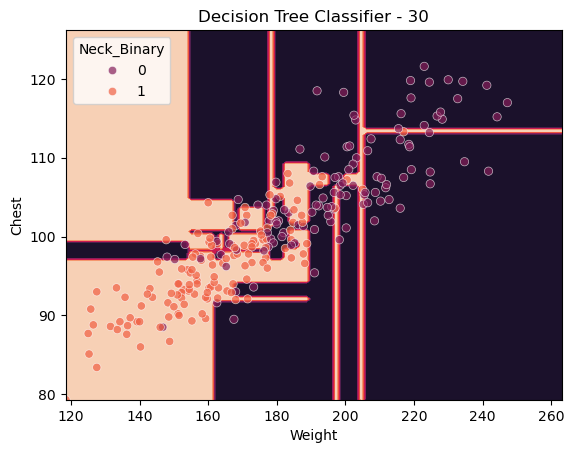

In [17]:
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=1) # недообучено
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=3) # лучшее
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=5) 
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=8) # переобучено
DecisionTreeClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=30) # переобучено

In [18]:
def KNeighborsClassifierFunc(data, x, y, label, depth):
    model = KNeighborsClassifier(n_neighbors=depth)
    
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    xlim = (data[x].min(), data[x].max()-100)
    ylim = (data[y].min(), data[y].max()-10)
    model.fit(data.loc[:,[x,y]], data[label])
    grid_x = np.linspace(*xlim, 100)
    grid_y = np.linspace(*ylim, 100)
    xx, yy = np.meshgrid(grid_x, grid_y)
    grid = np.c_[xx.ravel(), yy.ravel()]
    # в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
    prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
    ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))
    ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax, alpha=0.7)

    ax.set_title(f'KNeighbors Classifier - {depth}')
    
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
# Обучение и кросс-валидация для KNeighborsClassifier
knn_scores = []
knn_scores_test = []
for n_neighbors in knn_parameters:
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_scaled, y, cv=5)
    knn_scores.append(scores.mean())
    y_pred = model.predict(X_train)
    knn_scores_test.append(accuracy_score(y_train,y_pred))

for i in range(n):
    print(f'{i+1:3} | {knn_scores[i]:.5f} | {knn_scores_test[i]:.5f}')

  1 | 0.69467 | 0.99432
  2 | 0.69851 | 0.88636
  3 | 0.74227 | 0.89205
  4 | 0.73035 | 0.88636
  5 | 0.80573 | 0.86364
  6 | 0.79804 | 0.85227
  7 | 0.80588 | 0.84659
  8 | 0.78196 | 0.84659
  9 | 0.80980 | 0.84659
 10 | 0.80204 | 0.84091
 11 | 0.81365 | 0.82955
 12 | 0.80573 | 0.82386
 13 | 0.82157 | 0.81818
 14 | 0.80573 | 0.82386
 15 | 0.81357 | 0.82386
 16 | 0.80973 | 0.81818
 17 | 0.81349 | 0.82955
 18 | 0.80580 | 0.82386
 19 | 0.80973 | 0.82955
 20 | 0.80973 | 0.82955
 21 | 0.81365 | 0.81818
 22 | 0.80980 | 0.82955
 23 | 0.81365 | 0.81250
 24 | 0.82557 | 0.81818
 25 | 0.81373 | 0.80114
 26 | 0.81773 | 0.81818
 27 | 0.80973 | 0.81250
 28 | 0.81365 | 0.81818
 29 | 0.81757 | 0.79545
 30 | 0.82149 | 0.80114


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


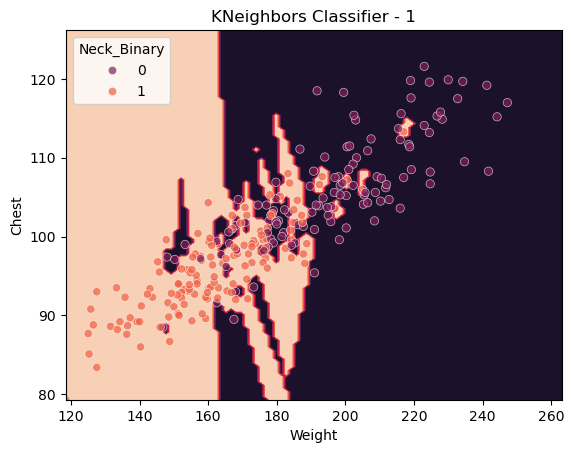

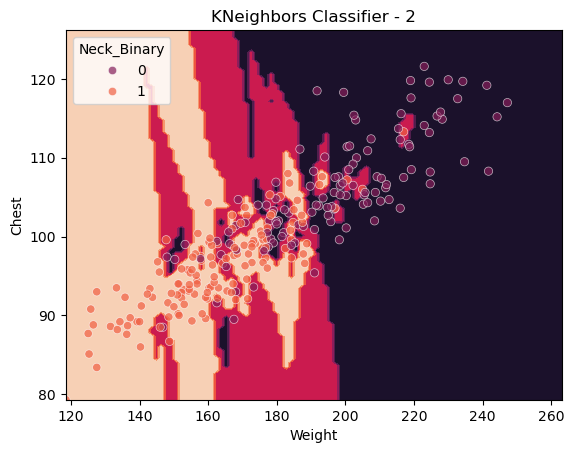

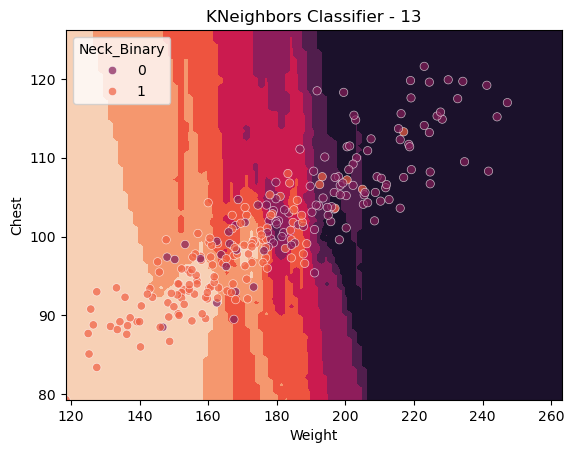

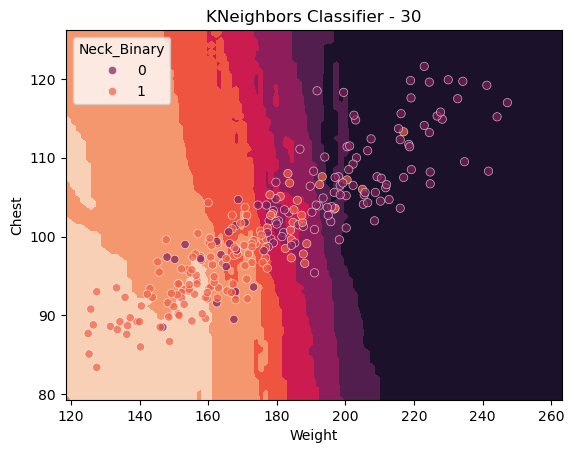

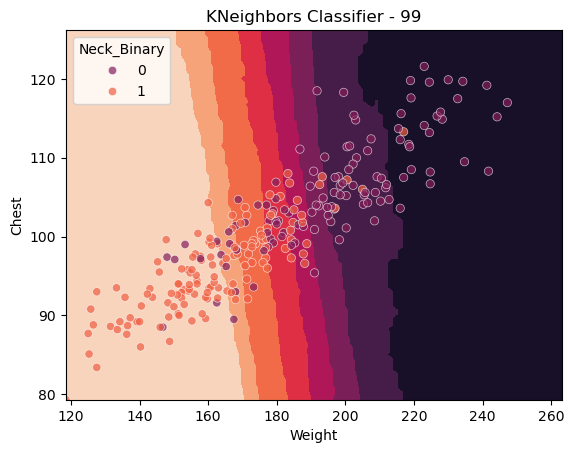

In [19]:
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=1) # переобучено
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=2)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=13) # лучшее
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=30)
KNeighborsClassifierFunc(data, x='Weight', y='Chest', label='Neck_Binary', depth=99) # недообучено

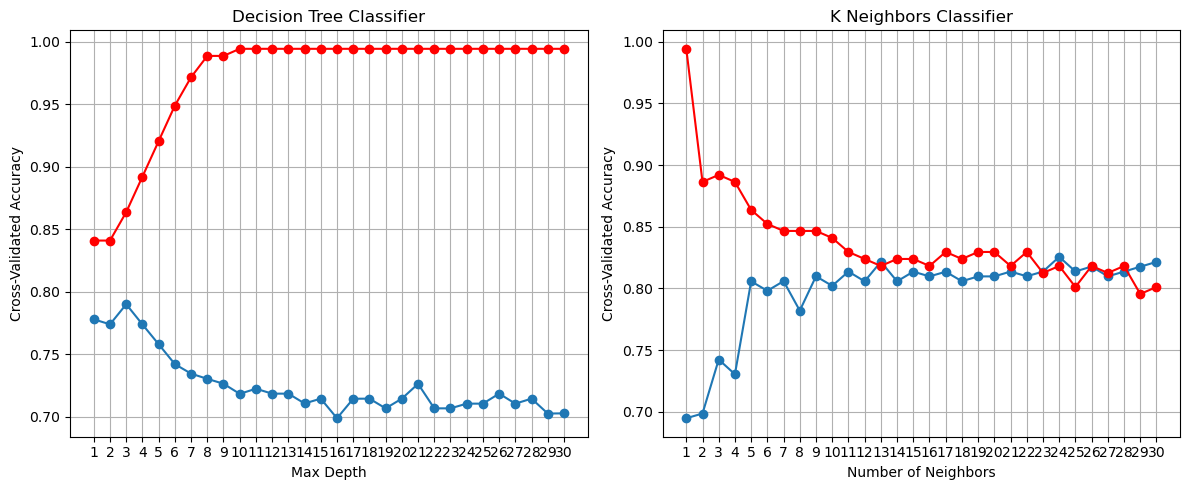

In [20]:
# Построение графиков
plt.figure(figsize=(12, 5))

# Decision Tree
plt.subplot(1, 2, 1)
plt.plot(dtc_parameters, dtc_scores, marker='o')
plt.plot(dtc_parameters, dtc_scores_test, marker='o', color ='red')
plt.title('Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(dtc_parameters)
plt.grid()

# K Neighbors
plt.subplot(1, 2, 2)
plt.plot(knn_parameters, knn_scores, marker='o')
plt.plot(knn_parameters, knn_scores_test, marker='o', color ='red')
plt.title('K Neighbors Classifier')
plt.xlabel('Number of Neighbors')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(knn_parameters)
plt.grid()

plt.tight_layout()
plt.show()

* Постройте карты работы метода опорных векторов с разными ядрами (sklearn.svm.SVC, для рисования предсказания используйте метод decision_function)

In [22]:
from sklearn import datasets
from sklearn.svm import SVC

def decision_function_Func(data, xxx, yyy, label, Xmaxminus=0,Ymaxminus=0,eps=0.1):
    # Генерируем искусственный набор данных
    X = data[[xxx, yyy]]
    y = data[label]
    # Установка значений для осей
    x_min, x_max = data[xxx].min() - 1, data[xxx].max() + 1 - Xmaxminus
    y_min, y_max = data[yyy].min() - 1, data[yyy].max() + 1 - Ymaxminus

    # Создание сетки для визуализации
    xx, yy = np.meshgrid(np.arange(x_min, x_max, eps), np.arange(y_min, y_max, eps))
    
    # Перебор различных ядер
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    titles = ['Линейное ядро', 'Полиномиальное ядро', 'Ядро радиальной функции', 'Сигмоидное ядро']
    
    plt.figure(figsize=(12, 10))
    
    

    for i, kernel in enumerate(kernels):
        # Создаем модель SVC с определенным ядром
        clf = SVC(kernel=kernel, gamma='scale')
        clf.fit(X, y)
        
        # Получаем предсказания для сетки
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        # Строим карту
        plt.subplot(2, 2, i + 1)
        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(data[xxx], data[yyy], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.5)
        plt.title(titles[i])
        plt.xlabel(xxx)
        plt.ylabel(yyy)
    
    plt.tight_layout()
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


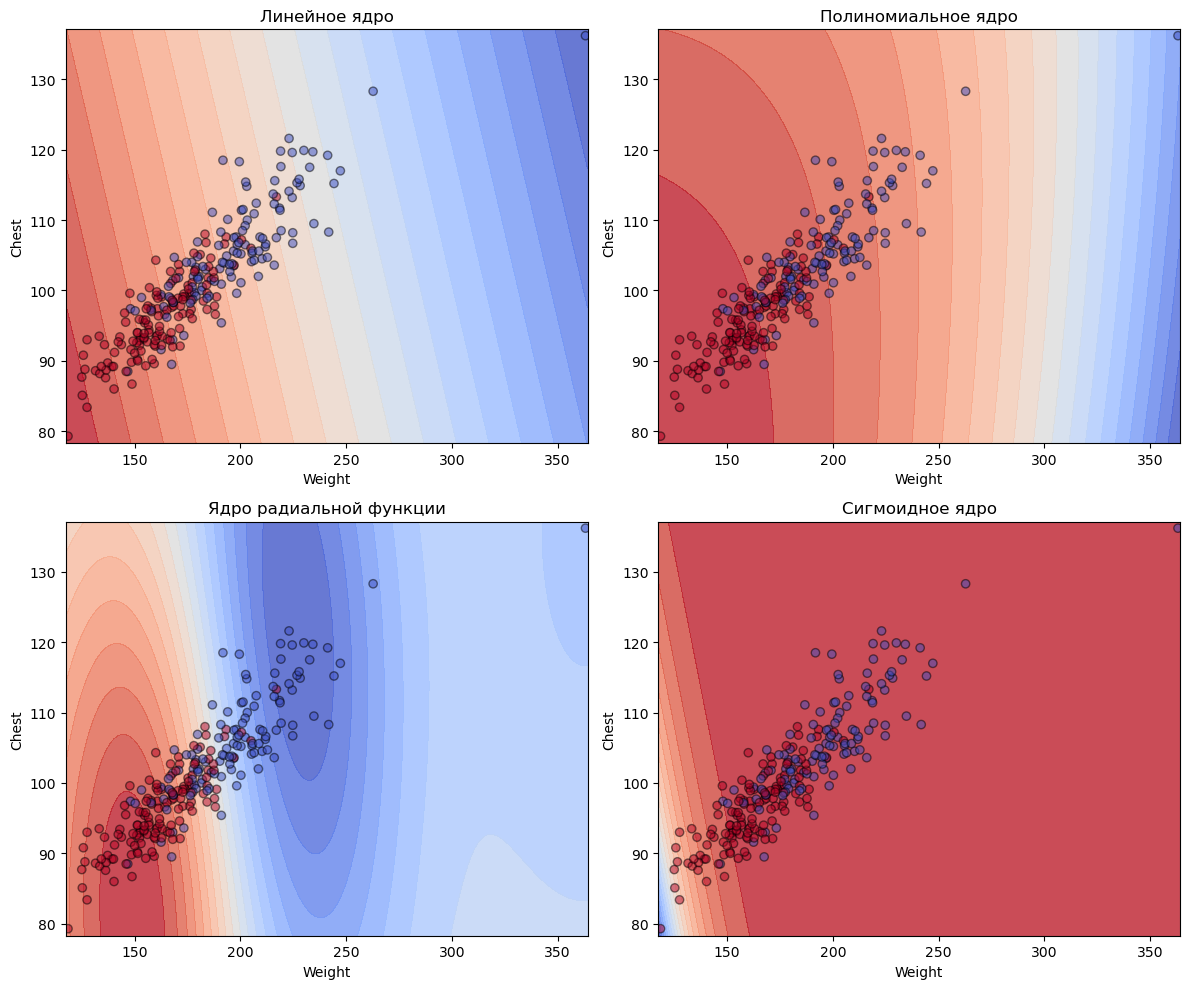

In [23]:
decision_function_Func(data, xxx='Weight', yyy='Chest', label='Neck_Binary')

* Сравните карты работы линейной регрессии sklearn.linear_model.LinearRegression (метод predict) с картой линейного алгоритма классификации sklearn.linear_model.LogisticRegression (метод predict_proba). Уменьшите размер выборки так, чтобы карты отличались. Выясните и запишите в отчете, как и почему отличаются линейные алгоритмы

In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
from sklearn.datasets import make_classification

In [322]:
X = data[[target[1], target[2]]]
y = data[target[0]]

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [324]:
# Линейная регрессия
lin_reg = LinearRegression(positive=True)
lin_reg.fit(X_train, y_train)
grid_x1 = np.linspace(data[target[1]].min(), data[target[1]].max(), 100)
grid_x2 = np.linspace(data[target[2]].min(), data[target[2]].max(), 100)
xx1, yy1 = np.meshgrid(grid_x1, grid_x2)
predictions_linear = lin_reg.predict(np.c_[xx1.ravel(), yy1.ravel()]).reshape(xx1.shape)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [326]:
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


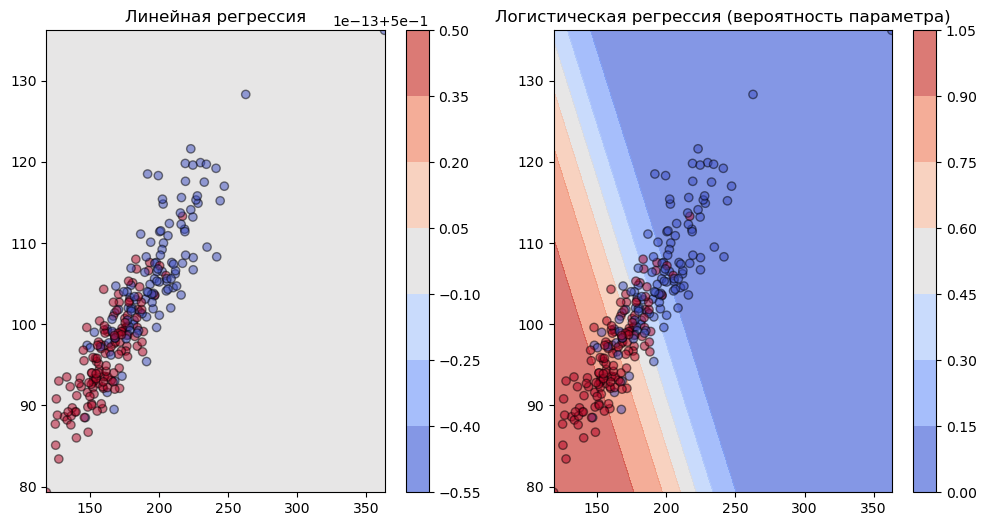

In [328]:
# Визуализация результатов
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Карта линейной регрессии
contour1 = axs[0].contourf(xx1, yy1, predictions_linear, cmap='coolwarm', alpha=0.7)
axs[0].scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[0].set_title("Линейная регрессия")
fig.colorbar(contour1, ax=axs[0], orientation='vertical')
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)
# Карта логистической регрессии
contour2 = axs[1].contourf(xx1, yy1, predictions_logistic, cmap='coolwarm', alpha=0.7)
axs[1].scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[1].set_title("Логистическая регрессия (вероятность параметра)")
fig.colorbar(contour2, ax=axs[1], orientation='vertical')

plt.show()

# Линейная регрессия решает задачу разделения непревывных данных, 
# и для бинарной целевой функции она покажет градиент.
# Логическая регрессия используется для поиска вероятности точки принадлежать классу,
# и для бинарной целевой функции подходит куда как больше

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


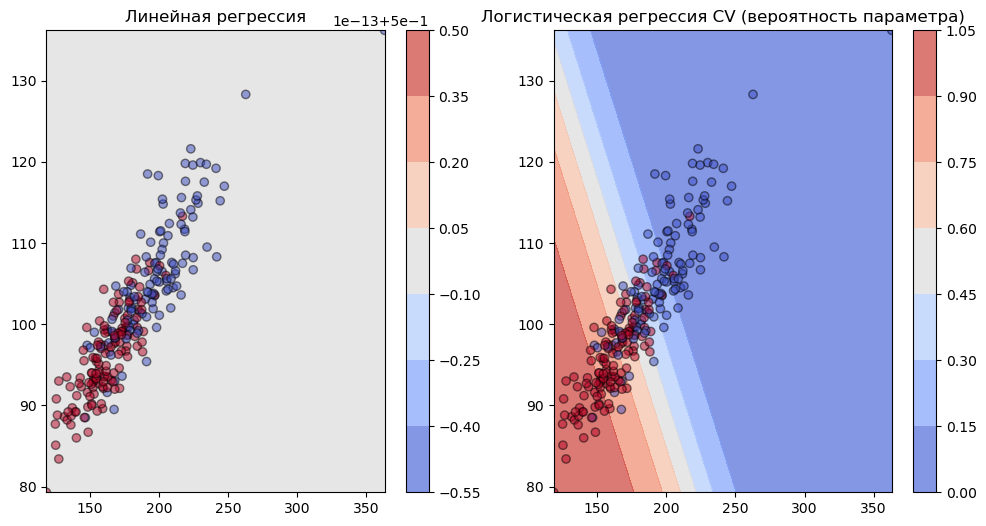

In [330]:
# Логистическая регрессия
log_reg = LogisticRegressionCV(solver='liblinear')
log_reg.fit(X_train, y_train)
predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)

# Визуализация результатов
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Карта линейной регрессии
contour1 = axs[0].contourf(xx1, yy1, predictions_linear, cmap='coolwarm', alpha=0.7)
axs[0].scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[0].set_title("Линейная регрессия")
fig.colorbar(contour1, ax=axs[0], orientation='vertical')
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)
# Карта логистической регрессии
contour2 = axs[1].contourf(xx1, yy1, predictions_logistic, cmap='coolwarm', alpha=0.7)
axs[1].scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[1].set_title("Логистическая регрессия CV (вероятность параметра)")
fig.colorbar(contour2, ax=axs[1], orientation='vertical')

plt.show()

# Линейная регрессия решает задачу разделения непревывных данных, 
# и для бинарной целевой функции она покажет градиент.
# Логическая регрессия используется для поиска вероятности точки принадлежать классу,
# и для бинарной целевой функции подходит куда как больше

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


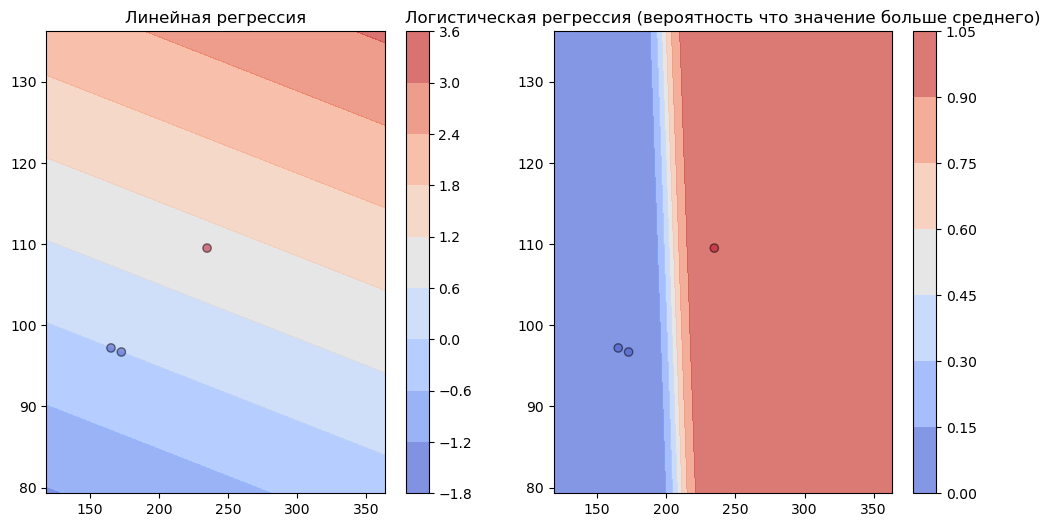

ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=3.

In [343]:
X = data[[target[1], target[2]]]
y = (data['Neck'] >= data['Neck'].mean()).astype(int)
test_size = 0.985
# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size=test_size, random_state=42)

# Линейная регрессия
lin_reg = LinearRegression(positive=False)
lin_reg.fit(X_train, y_train)
grid_x1 = np.linspace(data[target[1]].min(), data[target[1]].max(), 100)
grid_x2 = np.linspace(data[target[2]].min(), data[target[2]].max(), 100)
xx1, yy1 = np.meshgrid(grid_x1, grid_x2)
predictions_linear = lin_reg.predict(np.c_[xx1.ravel(), yy1.ravel()]).reshape(xx1.shape)

y = (data['Neck'] >= data['Neck'].mean()).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
# Логистическая регрессия
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)

# Визуализация результатов
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Карта линейной регрессии
contour1 = axs[0].contourf(xx1, yy1, predictions_linear, cmap='coolwarm', alpha=0.7)
axs[0].scatter(X_train[target[1]], X_train[target[2]], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[0].set_title("Линейная регрессия")
fig.colorbar(contour1, ax=axs[0], orientation='vertical')

# Карта логистической регрессии
contour2 = axs[1].contourf(xx1, yy1, predictions_logistic, cmap='coolwarm', alpha=0.7)
axs[1].scatter(X_train[target[1]], X_train[target[2]], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[1].set_title("Логистическая регрессия (вероятность что значение больше среднего)")
fig.colorbar(contour2, ax=axs[1], orientation='vertical')

plt.show()

log_reg = LogisticRegressionCV(solver='liblinear')
log_reg.fit(X_train, y_train)
xx1, yy1 = np.meshgrid(grid_x1, grid_x2)
predictions_linear = lin_reg.predict(np.c_[xx1.ravel(), yy1.ravel()]).reshape(xx1.shape)

predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)

# Визуализация результатов
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Карта линейной регрессии
contour1 = axs[0].contourf(xx1, yy1, predictions_linear, cmap='coolwarm', alpha=0.7)
axs[0].scatter(X_train[target[1]], X_train[target[2]], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[0].set_title("Линейная регрессия")
fig.colorbar(contour1, ax=axs[0], orientation='vertical')

# Карта логистической регрессии
contour2 = axs[1].contourf(xx1, yy1, predictions_logistic, cmap='coolwarm', alpha=0.7)
axs[1].scatter(X_train[target[1]], X_train[target[2]], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.5)
axs[1].set_title("Логистическая регрессия CV (вероятность что значение больше среднего)")
fig.colorbar(contour2, ax=axs[1], orientation='vertical')

plt.show()

C:\Users\Andrey\AppData\Local\Temp\ipykernel_18400\347630207.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
6     1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
233   1.0384     26.7   58  161.75   67.25  35.1   94.9     94.9  100.2   
238   1.0705     12.4   64  155.25   69.50  37.9   95.8     82.8   94.5   
240   1.0599     17.0   65  127.50   65.75  34.7   93.0     79.7   87.6   
245   1.0641     15.2   68  155.50   69.25  36.3   97.4     84.3   94.4   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  Neck_Binary  probability  
0     59.0  37.3   21.9

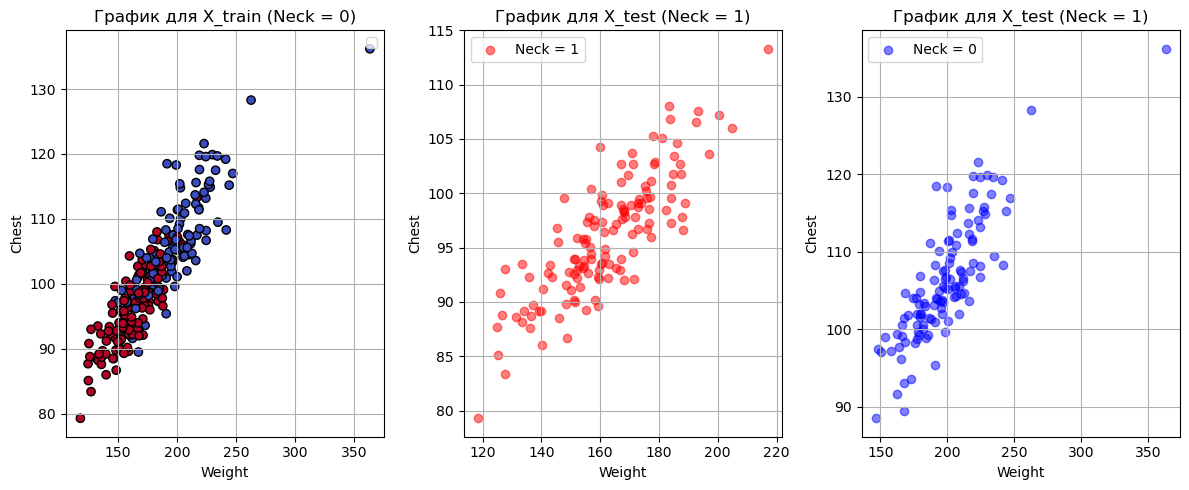

In [182]:
X = data[[target[1], target[2]]]
y = data['Neck_Binary']



test_size = 0.9
# Предположим, что target[1] и target[2] - это названия колонок
feature_1 = target[1]
feature_2 = target[2]

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[feature_1], X[feature_2], c=y, cmap='coolwarm', edgecolors='k')
plt.title('График для X_train (Neck = 0)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.grid()


X_0 = data[(data['Neck'] <= 38)]
X_1 = data[(data['Neck'] > 38)]
print(X_0)
plt.subplot(1, 3, 2)
plt.scatter(X_0[feature_1], X_0[feature_2], color='red', label='Neck = 1', alpha=0.5)
plt.title('График для X_test (Neck = 1)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
plt.scatter(X_1[feature_1], X_1[feature_2], color='blue', label='Neck = 0', alpha=0.5)
plt.title('График для X_test (Neck = 1)')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

* Постройте карту работы композиции деревьев sklearn.ensemble.ExtraTreesClassifier (метод predict_proba). Является ли он переобученным? Напишите в комментариях обоснование вашего ответа на этот вопрос.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


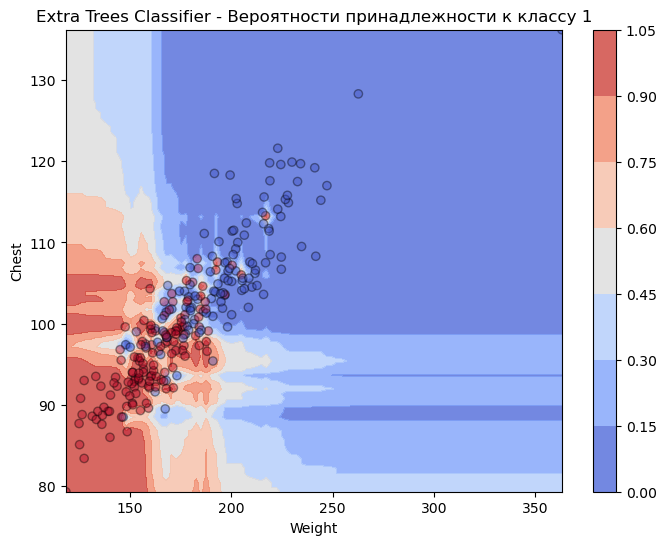

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification

X = data[[target[1], target[2]]]
y = data[target[0]]

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Создание сетки для предсказаний
grid_x1 = np.linspace(data[target[1]].min(), data[target[1]].max(), 100)
grid_x2 = np.linspace(data[target[2]].min(), data[target[2]].max(), 100)
xx1, yy1 = np.meshgrid(grid_x1, grid_x2)

# Предсказание вероятностей
predictions_prob = model.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)

# Визуализация результатов
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx1, yy1, predictions_prob, cmap='coolwarm', alpha=0.8)
plt.colorbar(contour)
plt.scatter(data[target[1]], data[target[2]], c=data[target[0]], cmap='coolwarm', edgecolors='k', alpha=0.4)
plt.title("Extra Trees Classifier - Вероятности принадлежности к классу 1")
plt.xlabel(target[1])
plt.ylabel(target[2])
plt.show()


In [34]:
from sklearn.metrics import accuracy_score

# Получение прогнозов на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

# Да, данный метод является переобученным, точность на 
# обучающей выборке значительно выше чем на тестовой

Точность на обучающей выборке: 0.994
Точность на тестовой выборке: 0.671


## 2. Метрики качества

* Для логистической регрессии предскажите вероятности класса 1 для всех объектов *полной* выборки. Постройте на одном графике разными полупрозрачными цветами нормированные гистограммы вероятностей для обоих целевых классов (см. ниже "полезные кусочки кода"). Найдите визуально наилучшее пороговое значение вероятности, которое отделяет один класс от другого.

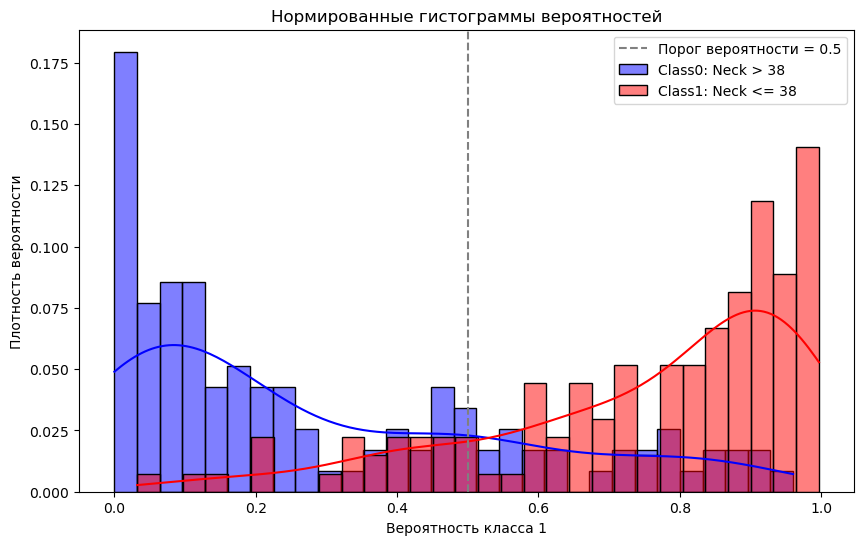

In [37]:
# Логистическая регрессия
log_reg1 = LogisticRegression()
log_reg1.fit(data.loc[:,[target[1], target[2]]], data[target[0]])

data['probability'] = log_reg1.predict_proba(data.loc[:,[target[1], target[2]]])[:,1]

plt.figure(figsize=(10, 6))
sns.histplot(data[data[target[0]] == 0]['probability'], bins=30, color='blue', kde=True, alpha=0.5, stat='probability', label='Class0: Neck > 38')
sns.histplot(data[data[target[0]] == 1]['probability'], bins=30, color='red', kde=True, alpha=0.5, stat='probability', label='Class1: Neck <= 38')
# Настройки графика
plt.title("Нормированные гистограммы вероятностей")
plt.xlabel("Вероятность класса 1")
plt.ylabel("Плотность вероятности")
plt.axvline(x=0.5, color='gray', linestyle='--', label='Порог вероятности = 0.5')  # Добавление линии порога
plt.legend()
plt.show()


* Запрограммируйте функцию, которая вычисляет [метрики качества](https://en.wikipedia.org/wiki/Confusion_matrix): матрицу ошибок, Accuracy, TPR, FPR, TNR, FNR, Precision, Recall, F1-меру, Selectivity, Specificity, Balanced accuracy, Adjusted balanced accuracy (sklearn.metrics.balanced_accuracy_score). Сравнивая качество логистической регрессии для разных пороговых значений и разных размеров подвыборки вашего датасета, найдите и опишите недостатки метрик качества. Какие метрики качества на вашем датасете оказались лучшими (имеющими меньше всего недостатков)?

In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

def calculate_metrics(y_true, y_probs, threshold):
    # Преобразуем вероятности в предсказания
    y_pred = (y_probs >= threshold).astype(int)

    # Вычисление матрицы ошибок
    cm = confusion_matrix(y_true, y_pred)
    
    TN, FP, FN, TP = cm.ravel()
    
    P=y_true[y_true==True].shape[0]
    N=y_true[y_true==False].shape[0]
    
    # Рассчет:
    accuracy = accuracy_score(y_true, y_pred)
    TPR = TP / P  # True Positive Rate
    FPR = FP / N  # False Positive Rate
    TNR = TN / N  # True Negative Rate
    FNR = FN / P  # False Negative Rate
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    selectivity = TP / P  # Специфичность также
    specificity = TN / N
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    
    adjusted_balanced_acc = balanced_accuracy_score(y_true, y_pred)  # С учетом несбалансированных данных

    return {
        "Confusion Matrix": cm,
        "Accuracy": accuracy,
        "TPR": TPR,
        "FPR": FPR,
        "TNR": TNR,
        "FNR": FNR,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Selectivity": selectivity,
        "Specificity": specificity,
        "Balanced Accuracy": balanced_acc,
        "Adjusted Balanced Accuracy": adjusted_balanced_acc
    }

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

def test_log_TPR(data, target, test_size=0.3):
    
    X = data[[target[1], target[2]]]
    y = data[target[0]]
    
    # Делим данные на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Логистическая регрессия
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    predictions_logistic = log_reg.predict_proba(np.c_[xx1.ravel(), yy1.ravel()])[:, 1].reshape(xx1.shape)
    
    # Предсказание вероятностей
    y_probs = log_reg.predict_proba(X_test)[:, 1]
    
    # Изменение порога
    thresholds = np.arange(0.0, 1.1, 0.1)
    metrics_results = {}
    
    print(f'########################################## Число в тестовой выборке = {test_size:.3f} ############################################')
    for threshold in thresholds:
        mmmm = calculate_metrics(y_test, y_probs, threshold)
    
        print(f'##################### Порог = {threshold:.3f} #######################')
        key = 'Precision'
        print(f'{key} : {mmmm[key]}')
        for key in mmmm.keys():
            print(f'{key} : {mmmm[key]}')
        
    
        metrics_results[threshold] = mmmm
    return metrics_results

In [41]:
test01 = test_log_TPR(data, target, test_size=0.1)

########################################## Число в тестовой выборке = 0.100 ############################################
##################### Порог = 0.000 #######################
Precision : 0.5769230769230769
Confusion Matrix : [[ 0 11]
 [ 0 15]]
Accuracy : 0.5769230769230769
TPR : 1.0
FPR : 1.0
TNR : 0.0
FNR : 0.0
Precision : 0.5769230769230769
Recall : 1.0
F1 Score : 0.7317073170731707
Selectivity : 1.0
Specificity : 0.0
Balanced Accuracy : 0.5
Adjusted Balanced Accuracy : 0.5
##################### Порог = 0.100 #######################
Precision : 0.7142857142857143
Confusion Matrix : [[ 5  6]
 [ 0 15]]
Accuracy : 0.7692307692307693
TPR : 1.0
FPR : 0.5454545454545454
TNR : 0.45454545454545453
FNR : 0.0
Precision : 0.7142857142857143
Recall : 1.0
F1 Score : 0.8333333333333334
Selectivity : 1.0
Specificity : 0.45454545454545453
Balanced Accuracy : 0.7272727272727273
Adjusted Balanced Accuracy : 0.7272727272727273
##################### Порог = 0.200 #######################
Precision 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [42]:
test03=test_log_TPR(data, target, test_size=0.3)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


########################################## Число в тестовой выборке = 0.300 ############################################
##################### Порог = 0.000 #######################
Precision : 0.5921052631578947
Confusion Matrix : [[ 0 31]
 [ 0 45]]
Accuracy : 0.5921052631578947
TPR : 1.0
FPR : 1.0
TNR : 0.0
FNR : 0.0
Precision : 0.5921052631578947
Recall : 1.0
F1 Score : 0.743801652892562
Selectivity : 1.0
Specificity : 0.0
Balanced Accuracy : 0.5
Adjusted Balanced Accuracy : 0.5
##################### Порог = 0.100 #######################
Precision : 0.6818181818181818
Confusion Matrix : [[10 21]
 [ 0 45]]
Accuracy : 0.7236842105263158
TPR : 1.0
FPR : 0.6774193548387096
TNR : 0.3225806451612903
FNR : 0.0
Precision : 0.6818181818181818
Recall : 1.0
F1 Score : 0.8108108108108109
Selectivity : 1.0
Specificity : 0.3225806451612903
Balanced Accuracy : 0.6612903225806451
Adjusted Balanced Accuracy : 0.6612903225806451
##################### Порог = 0.200 #######################
Precision : 0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
test05=test_log_TPR(data, target, test_size=0.5)

########################################## Число в тестовой выборке = 0.500 ############################################
##################### Порог = 0.000 #######################
Precision : 0.5714285714285714
Confusion Matrix : [[ 0 54]
 [ 0 72]]
Accuracy : 0.5714285714285714
TPR : 1.0
FPR : 1.0
TNR : 0.0
FNR : 0.0
Precision : 0.5714285714285714
Recall : 1.0
F1 Score : 0.7272727272727273
Selectivity : 1.0
Specificity : 0.0
Balanced Accuracy : 0.5
Adjusted Balanced Accuracy : 0.5
##################### Порог = 0.100 #######################
Precision : 0.6635514018691588
Confusion Matrix : [[18 36]
 [ 1 71]]
Accuracy : 0.7063492063492064
TPR : 0.9861111111111112
FPR : 0.6666666666666666
TNR : 0.3333333333333333
FNR : 0.013888888888888888
Precision : 0.6635514018691588
Recall : 0.9861111111111112
F1 Score : 0.7932960893854749
Selectivity : 0.9861111111111112
Specificity : 0.3333333333333333
Balanced Accuracy : 0.6597222222222222
Adjusted Balanced Accuracy : 0.6597222222222222
##########

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##################### Порог = 1.000 #######################
Precision : 0.0
Confusion Matrix : [[54  0]
 [72  0]]
Accuracy : 0.42857142857142855
TPR : 0.0
FPR : 0.0
TNR : 1.0
FNR : 1.0
Precision : 0.0
Recall : 0.0
F1 Score : 0.0
Selectivity : 0.0
Specificity : 1.0
Balanced Accuracy : 0.5
Adjusted Balanced Accuracy : 0.5


In [44]:
def vivod(key, key1, test01, test03, test05):
    thresholds = np.arange(0.0, 1.1, 0.1)
    print(f'{key:22} || {key1:22}')
    print(' p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |')
    for i in thresholds:
        print(f'{i:.2f}| {test01[i][key]:.2f}, {test03[i][key]:.2f}, {test05[i][key]:.2f} || {i:.2f}| {test01[i][key1]:.2f}, {test03[i][key1]:.2f}, {test05[i][key1]:.2f}') 

In [45]:
vivod('Accuracy','Precision', test01, test03, test05)

Accuracy               || Precision             
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 0.58, 0.59, 0.57
0.10| 0.77, 0.72, 0.71 || 0.10| 0.71, 0.68, 0.66
0.20| 0.81, 0.80, 0.78 || 0.20| 0.75, 0.75, 0.73
0.30| 0.77, 0.80, 0.80 || 0.30| 0.74, 0.78, 0.78
0.40| 0.77, 0.79, 0.80 || 0.40| 0.76, 0.80, 0.80
0.50| 0.81, 0.80, 0.83 || 0.50| 0.81, 0.84, 0.87
0.60| 0.85, 0.79, 0.81 || 0.60| 1.00, 0.94, 0.93
0.70| 0.77, 0.75, 0.79 || 0.70| 1.00, 0.93, 0.94
0.80| 0.69, 0.71, 0.75 || 0.80| 1.00, 0.96, 0.95
0.90| 0.54, 0.55, 0.60 || 0.90| 1.00, 1.00, 1.00
1.00| 0.42, 0.41, 0.43 || 1.00| 0.00, 0.00, 0.00


In [46]:
vivod('Accuracy', 'Recall', test01, test03, test05)

Accuracy               || Recall                
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 1.00, 1.00, 1.00
0.10| 0.77, 0.72, 0.71 || 0.10| 1.00, 1.00, 0.99
0.20| 0.81, 0.80, 0.78 || 0.20| 1.00, 1.00, 0.97
0.30| 0.77, 0.80, 0.80 || 0.30| 0.93, 0.93, 0.92
0.40| 0.77, 0.79, 0.80 || 0.40| 0.87, 0.87, 0.88
0.50| 0.81, 0.80, 0.83 || 0.50| 0.87, 0.82, 0.83
0.60| 0.85, 0.79, 0.81 || 0.60| 0.73, 0.69, 0.72
0.70| 0.77, 0.75, 0.79 || 0.70| 0.60, 0.62, 0.68
0.80| 0.69, 0.71, 0.75 || 0.80| 0.47, 0.53, 0.58
0.90| 0.54, 0.55, 0.60 || 0.90| 0.20, 0.24, 0.31
1.00| 0.42, 0.41, 0.43 || 1.00| 0.00, 0.00, 0.00


In [47]:
vivod('Accuracy', 'F1 Score', test01, test03, test05)

Accuracy               || F1 Score              
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 0.73, 0.74, 0.73
0.10| 0.77, 0.72, 0.71 || 0.10| 0.83, 0.81, 0.79
0.20| 0.81, 0.80, 0.78 || 0.20| 0.86, 0.86, 0.83
0.30| 0.77, 0.80, 0.80 || 0.30| 0.82, 0.85, 0.84
0.40| 0.77, 0.79, 0.80 || 0.40| 0.81, 0.83, 0.83
0.50| 0.81, 0.80, 0.83 || 0.50| 0.84, 0.83, 0.85
0.60| 0.85, 0.79, 0.81 || 0.60| 0.85, 0.79, 0.81
0.70| 0.77, 0.75, 0.79 || 0.70| 0.75, 0.75, 0.79
0.80| 0.69, 0.71, 0.75 || 0.80| 0.64, 0.69, 0.72
0.90| 0.54, 0.55, 0.60 || 0.90| 0.33, 0.39, 0.47
1.00| 0.42, 0.41, 0.43 || 1.00| 0.00, 0.00, 0.00


In [48]:
vivod('Accuracy', 'Selectivity', test01, test03, test05)

Accuracy               || Selectivity           
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 1.00, 1.00, 1.00
0.10| 0.77, 0.72, 0.71 || 0.10| 1.00, 1.00, 0.99
0.20| 0.81, 0.80, 0.78 || 0.20| 1.00, 1.00, 0.97
0.30| 0.77, 0.80, 0.80 || 0.30| 0.93, 0.93, 0.92
0.40| 0.77, 0.79, 0.80 || 0.40| 0.87, 0.87, 0.88
0.50| 0.81, 0.80, 0.83 || 0.50| 0.87, 0.82, 0.83
0.60| 0.85, 0.79, 0.81 || 0.60| 0.73, 0.69, 0.72
0.70| 0.77, 0.75, 0.79 || 0.70| 0.60, 0.62, 0.68
0.80| 0.69, 0.71, 0.75 || 0.80| 0.47, 0.53, 0.58
0.90| 0.54, 0.55, 0.60 || 0.90| 0.20, 0.24, 0.31
1.00| 0.42, 0.41, 0.43 || 1.00| 0.00, 0.00, 0.00


In [49]:
vivod('Accuracy', 'Specificity', test01, test03, test05)

Accuracy               || Specificity           
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 0.00, 0.00, 0.00
0.10| 0.77, 0.72, 0.71 || 0.10| 0.45, 0.32, 0.33
0.20| 0.81, 0.80, 0.78 || 0.20| 0.55, 0.52, 0.52
0.30| 0.77, 0.80, 0.80 || 0.30| 0.55, 0.61, 0.65
0.40| 0.77, 0.79, 0.80 || 0.40| 0.64, 0.68, 0.70
0.50| 0.81, 0.80, 0.83 || 0.50| 0.73, 0.77, 0.83
0.60| 0.85, 0.79, 0.81 || 0.60| 1.00, 0.94, 0.93
0.70| 0.77, 0.75, 0.79 || 0.70| 1.00, 0.94, 0.94
0.80| 0.69, 0.71, 0.75 || 0.80| 1.00, 0.97, 0.96
0.90| 0.54, 0.55, 0.60 || 0.90| 1.00, 1.00, 1.00
1.00| 0.42, 0.41, 0.43 || 1.00| 1.00, 1.00, 1.00


In [50]:
vivod('Accuracy', 'Balanced Accuracy', test01, test03, test05)

Accuracy               || Balanced Accuracy     
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 0.50, 0.50, 0.50
0.10| 0.77, 0.72, 0.71 || 0.10| 0.73, 0.66, 0.66
0.20| 0.81, 0.80, 0.78 || 0.20| 0.77, 0.76, 0.75
0.30| 0.77, 0.80, 0.80 || 0.30| 0.74, 0.77, 0.78
0.40| 0.77, 0.79, 0.80 || 0.40| 0.75, 0.77, 0.79
0.50| 0.81, 0.80, 0.83 || 0.50| 0.80, 0.80, 0.83
0.60| 0.85, 0.79, 0.81 || 0.60| 0.87, 0.81, 0.82
0.70| 0.77, 0.75, 0.79 || 0.70| 0.80, 0.78, 0.81
0.80| 0.69, 0.71, 0.75 || 0.80| 0.73, 0.75, 0.77
0.90| 0.54, 0.55, 0.60 || 0.90| 0.60, 0.62, 0.65
1.00| 0.42, 0.41, 0.43 || 1.00| 0.50, 0.50, 0.50


In [51]:
vivod('Accuracy', 'Adjusted Balanced Accuracy', test01, test03, test05)

Accuracy               || Adjusted Balanced Accuracy
 p  | 0.1 | 0.3 | 0.5  ||  p  | 0.1 | 0.3 | 0.5 |
0.00| 0.58, 0.59, 0.57 || 0.00| 0.50, 0.50, 0.50
0.10| 0.77, 0.72, 0.71 || 0.10| 0.73, 0.66, 0.66
0.20| 0.81, 0.80, 0.78 || 0.20| 0.77, 0.76, 0.75
0.30| 0.77, 0.80, 0.80 || 0.30| 0.74, 0.77, 0.78
0.40| 0.77, 0.79, 0.80 || 0.40| 0.75, 0.77, 0.79
0.50| 0.81, 0.80, 0.83 || 0.50| 0.80, 0.80, 0.83
0.60| 0.85, 0.79, 0.81 || 0.60| 0.87, 0.81, 0.82
0.70| 0.77, 0.75, 0.79 || 0.70| 0.80, 0.78, 0.81
0.80| 0.69, 0.71, 0.75 || 0.80| 0.73, 0.75, 0.77
0.90| 0.54, 0.55, 0.60 || 0.90| 0.60, 0.62, 0.65
1.00| 0.42, 0.41, 0.43 || 1.00| 0.50, 0.50, 0.50


* Прикрепите в Moodle ваш ноутбук и ссылку на ваш отчет (его нужно расшарить всем для чтения кнопкой Share)

In [53]:
#####

## Варианты датасетов:
1. [Hepatitis C Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/hepatitis-c-dataset) (целевой признак: пол пациента)
2. [Russian Demography Data](https://www.kaggle.com/datasets/dwdkills/russian-demography) (целевой признак: year<=2004)
3. [House prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv) (целевой признак: LotArea<=9480)
4. [Cryptocurrency Closing Price Prediction](https://zindi.africa/competitions/cryptocurrency-closing-price-prediction/data) (целевой признак: volatility<=0.013, удалите все строки, где не задана volatility)
5. [Video Game Sales](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) (целевой признак: Rating==E)
6. [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud) (целевой признак: Amount<=22)
7. [Pokemon Dataset with Team Combat](https://www.kaggle.com/code/tuannguyenvananh/descriptive-analysis-pokemon-eda-feat-satoshi/data?select=pokemon.csv) (целевой признак: Legendary)
8. [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv) (целевой признак: revenue>19млн)
9. [Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset) (целевой признак: Neck<=38)
10. [Chess Game Dataset](https://www.kaggle.com/datasets/datasnaek/chess?select=games.csv) (целевой признак: winner==white)
11. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) (целевой признак: residual sugar <= 2.2)
12. [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) (целевой признак: пол)
13. [Car Price Prediction Multiple Linear Regression](https://www.kaggle.com/datasets/hellbuoy/car-price-prediction) (целевой признак: horsepower <= 100)
14. [Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data) (целевой признак: возраст <= 40)
15. [World Happiness Report](https://www.kaggle.com/datasets/unsdsn/world-happiness) (целевой признак: Family <= 1)
16. [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams) (целевой признак: lunch)
17. [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) (целевой признак: возраст <= 30)
18. [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) (целевой признак: MaritalStatus==Married - бинарная классификация)
19. [Acoustic Extinguisher Fire Dataset](https://www.kaggle.com/datasets/muratkokludataset/acoustic-extinguisher-fire-dataset) (целевой признак: FUEL==gasoline - бинарная классификация)
20. [Pumpkin Classification : Autoviz](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) (целевой признак: Compactness<=0.7)
21. [Dry Bean Dataset](https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset) (целевой признак: Class==DERMASON)
22. [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices) (целевой признак: ocean_proximity == '<1H OCEAN')
23. [Data Science for Good: PASSNYC](https://www.kaggle.com/datasets/passnyc/data-science-for-good?resource=download) (целевой признак: Percent Black <= 40)
24. [Spotify Song Attributes](https://www.kaggle.com/datasets/geomack/spotifyclassification) (целевой признак: acousticness<=0.1)
25. [Real Estate DataSet](https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset) (целевой признак: PTRATIO>=18.84)
26. [Glass Classification](https://www.kaggle.com/datasets/uciml/glass) (целевой признак: Type==2)
27. [Car information dataset](https://www.kaggle.com/datasets/tawfikelmetwally/automobile-dataset) (целевой признак: model_year>=77)
28. [Sleep Health and Lifestyle Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) (целевой признак: Sleep Disorder == None)
29. [Другой датасет](https://www.kaggle.com/datasets) по согласованию с преподавателем практики и с изменением целевого признака (**датасеты у всех должны быть разными**). 

## Полезные кусочки кода

### отображение статистики:
```
pd.options.display.max_columns = data.shape[1]
data.describe(include='all')
```

### поиск "сильных" признаков:
```
import seaborn as sns
sns.set(rc={'figure.dpi':300})
label = 'укажите ваш целевой признак'
features = [c for c in data.columns if c != label and data.dtypes[c] != 'object']
X = data.loc[:,features]
y = data[label]
mi = sklearn.feature_selection.mutual_info_classif(X, y)
ax = sns.barplot(x=mi, y=features)
```

### график рассеяния:
```
ax = sns.scatterplot(data=data, x='имя столбца1', y='имя столбца2', hue=label, palette="deep")
```

### карта предсказания классификатора (цвет - вероятность класса 1):
```
x='имя столбца1'; y='имя столбца2'
model = конструктор модели

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
xlim = (data[x].min(), data[x].max())
ylim = (data[y].min(), data[y].max())
model.fit(data.loc[:,[x,y]], data[label])
grid_x = np.linspace(*xlim, 100)
grid_y = np.linspace(*ylim, 100)
xx, yy = np.meshgrid(grid_x, grid_y)
grid = np.c_[xx.ravel(), yy.ravel()]
# в следующей строчке с помощью функции isinstance хорошо бы проверить тип объекта model и в зависимости от этого вызывать метод predict, predict_proba или decision_function
prediction = model.predict_proba(grid)[:,1].reshape(xx.shape)
ax.contourf(xx, yy, prediction, cmap=sns.color_palette("rocket", as_cmap=True))

ax = sns.scatterplot(data=data, x=x, y=y, hue=label, palette="rocket", ax=ax)
ax.set_xlim(*xlim)
ax.set_ylim(*ylim)
```

### гистограмма:
```
# здесь предполагается, что предсказанные вероятности сохранены в столбец probability датафрейма data
ax = sns.histplot(data=data, x="probability", hue=label, kde=True)
```